In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numba

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install py-pde

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Sánchez García Fabricio Alejandro

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from matplotlib import cm
from skimage import color
from skimage import io
import numba
from numba import jit
from pde import CartesianGrid, VectorField

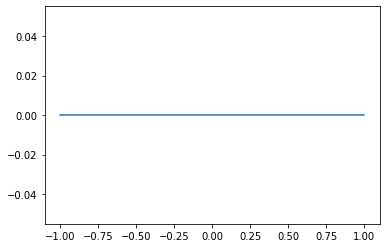

In [6]:
frontera = np.linspace(-1, 1, 100)
arriba_y = 0 *frontera
abajo_y = 0 *frontera
arriba_x = 0 * frontera
abajo_x =0 * frontera
plt.plot(frontera, abajo_x)




In [7]:
xv, yv = np.meshgrid(frontera, frontera)
xv

array([[-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       ...,
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ]])

In [8]:
@numba.jit("f8[:,:](f8[:,:], i8)", nopython=True, nogil=True)
def calcular_potencial(potencial, n_iter):
    length = len(potencial[0])
    for n in range(n_iter):
        for i in range(1, length-1):
            for j in range(1, length-1):
                potencial[i][j]= 1/4 * ( potencial[j+1][i] + potencial[j-1][i] + potencial[j][i+1] + potencial[j][i-1] )
    return potencial  

In [9]:
potencial = np.zeros((100,100))
potencial = np.zeros((100,100))
potencial[0,:] = abajo_y
potencial[-1,:] = arriba_y
potencial[:,0] = abajo_x
potencial[:,-1] = arriba_x
potencial = calcular_potencial(potencial, n_iter=100)
potencial

array([[-0., -0., -0., ...,  0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0., -0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., -0., -0., ...,  0.,  0.,  0.]])

In [10]:
def potencial_interior(x, y):
    return np.select([(x>-0.25)*(x<0.25)*(y>-0.25)*(y<0.25),
                     (x<=-0.25)+(x>=0.25)+(y<=-0.25)+(y>=0.25)],
                     [1,0])

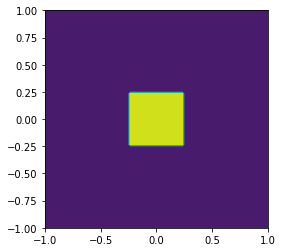

In [11]:
plt.figure(figsize=(4,4))
plt.contourf(xv, yv, potencial_interior(xv,yv))

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

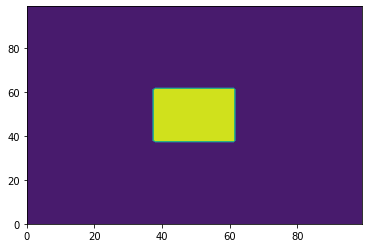

In [12]:
fijo = potencial_interior(xv, yv)
fijo_bool = fijo = fijo!=0
plt.contourf(fijo)
fijo_bool

In [13]:
@numba.jit("f8[:,:](f8[:,:], b1[:,:], i8)", nopython=True, nogil=True)
def calcular_potencial(potencial, fijo_bool, n_iter):
    length =  len(potencial[0])
    for n in range(n_iter):
        for i in range(1, length-1):
            for j in range(1, length-1):
                if not(fijo_bool[j][i]):
                    potencial[i][j]= 1/4 * ( potencial[j+1][i] + potencial[j-1][i] + potencial[j][i+1] + potencial[j][i-1] )
    return potencial 

In [14]:
potencial = np.zeros((100,100))
potencial[0,:] = abajo_y
potencial[-1,:] = arriba_y
potencial[:,0] = abajo_x
potencial[:,-1] = arriba_x
potencial[fijo_bool] = fijo[fijo_bool]
potencial = calcular_potencial(potencial, fijo_bool, n_iter=10000)

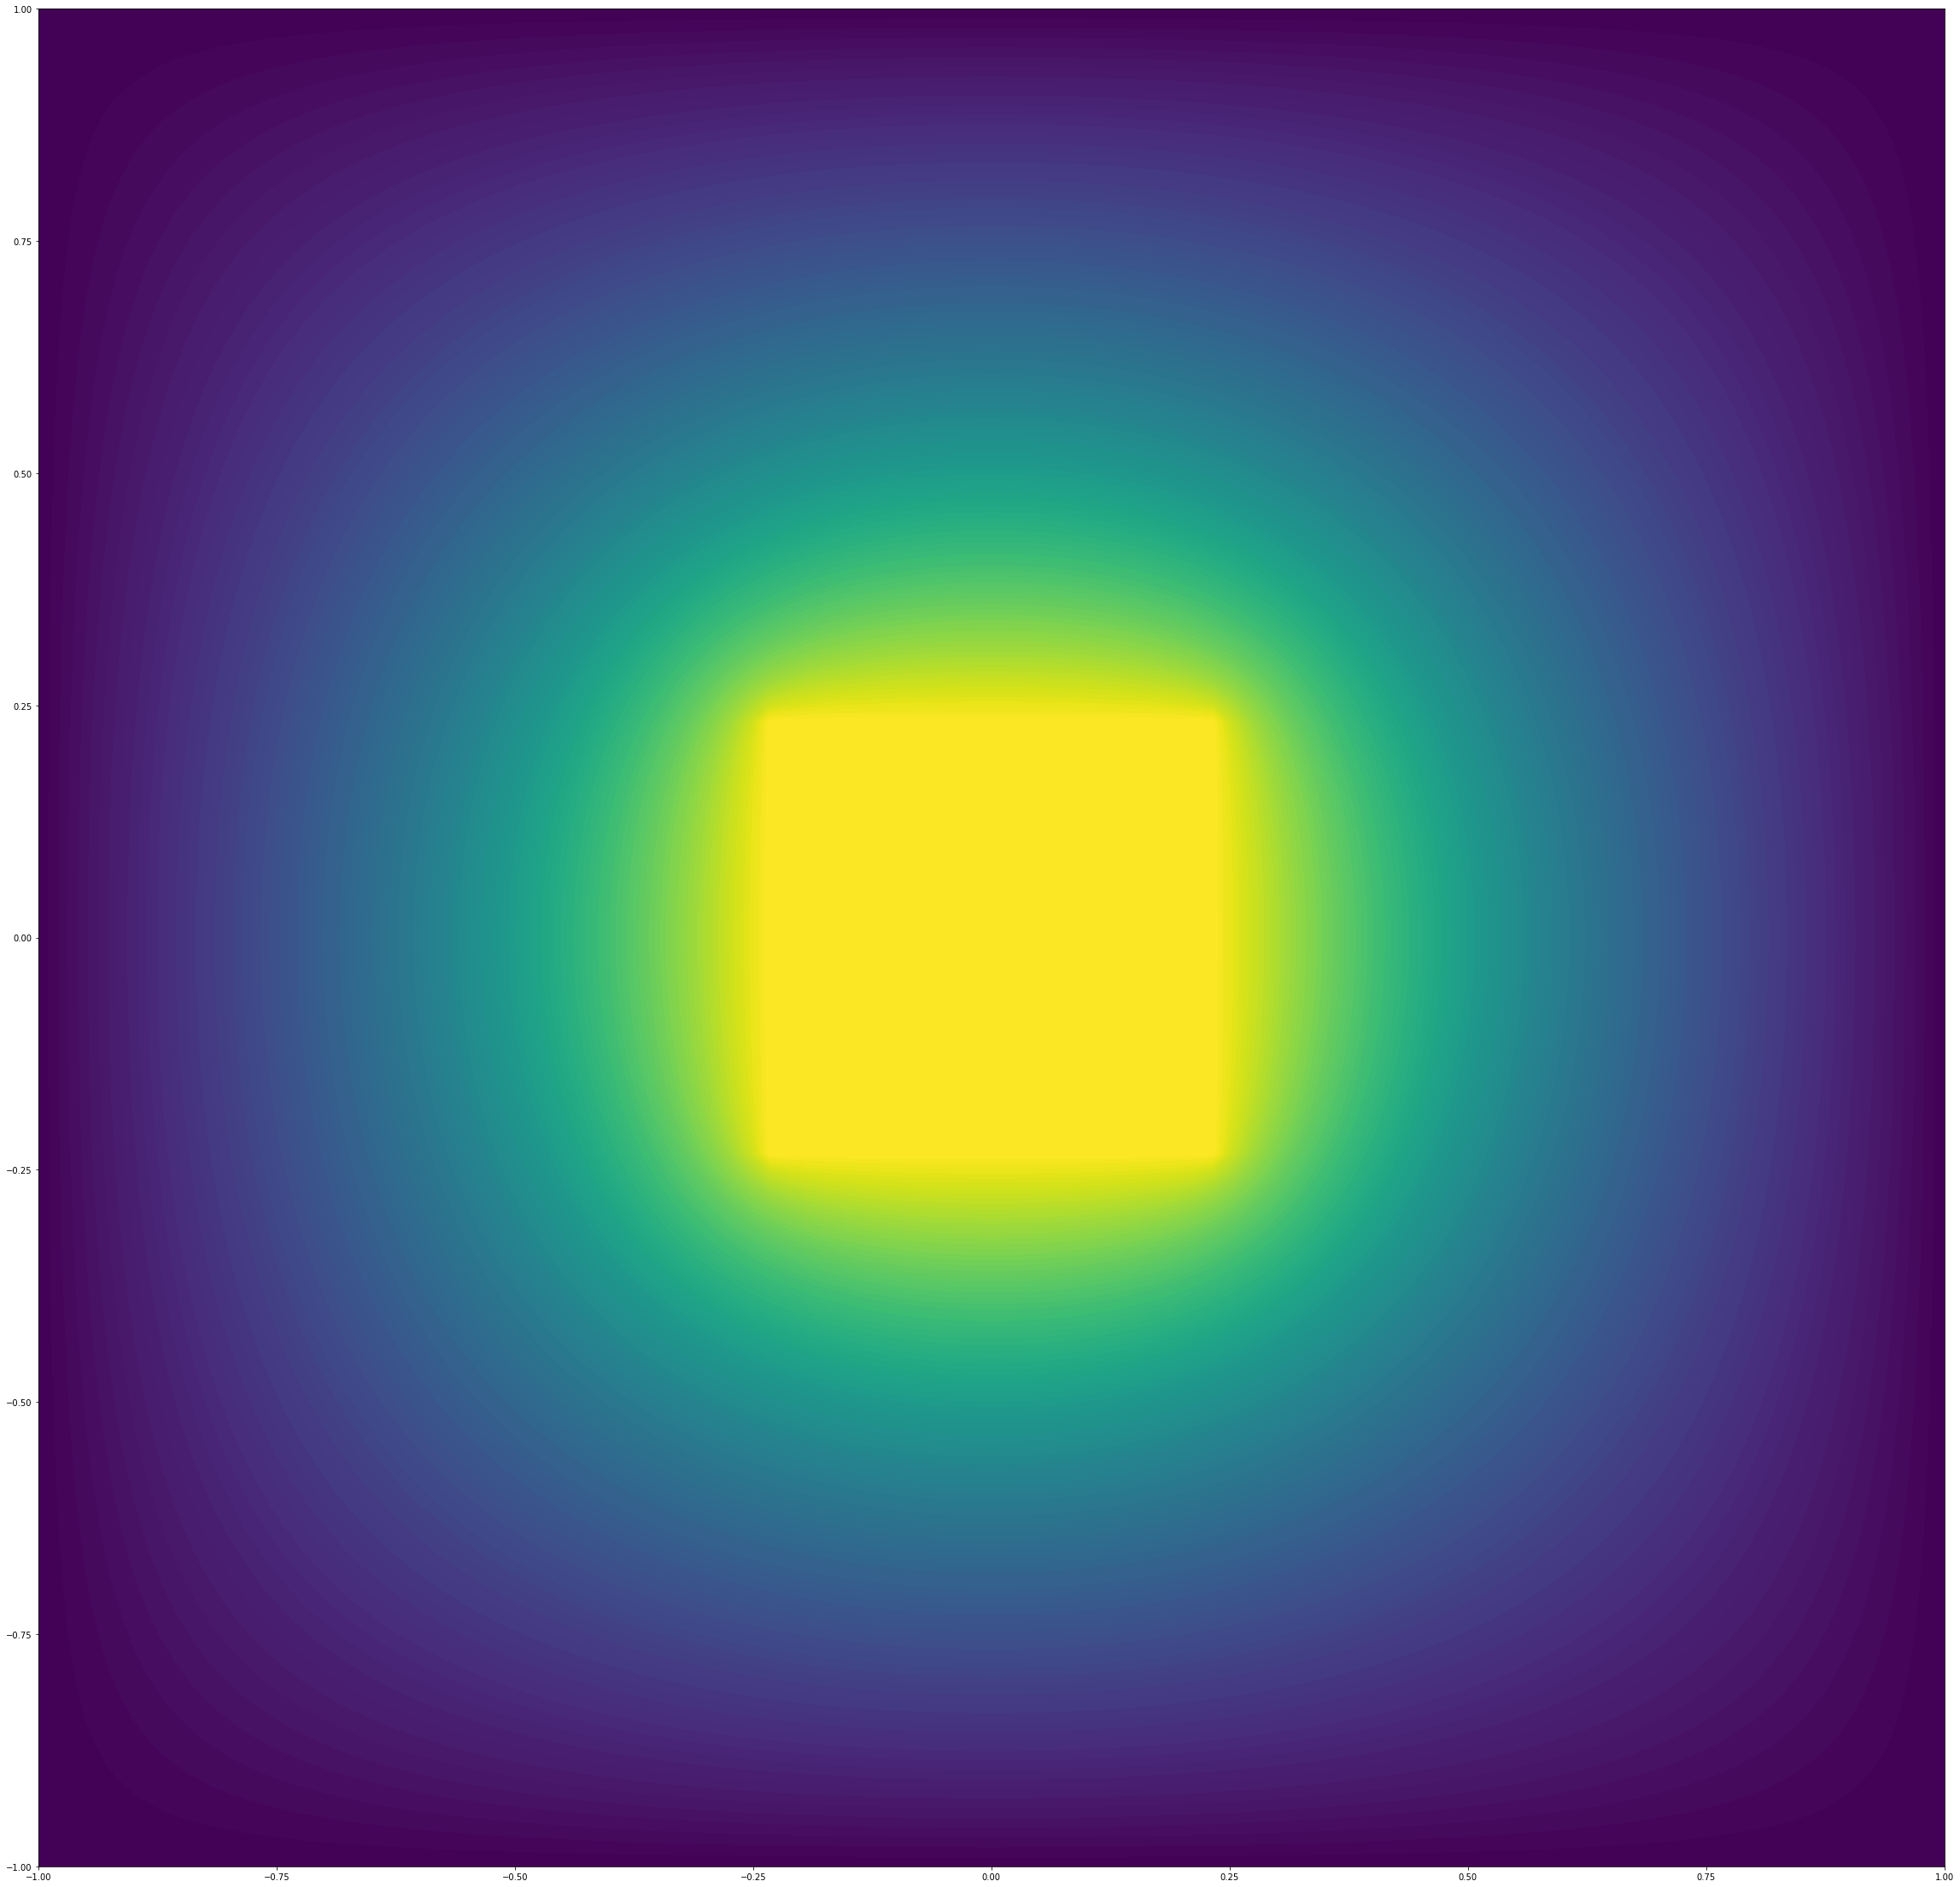

In [15]:
plt.figure(figsize=(40,40))
plt.contourf(xv, yv, potencial, 100)

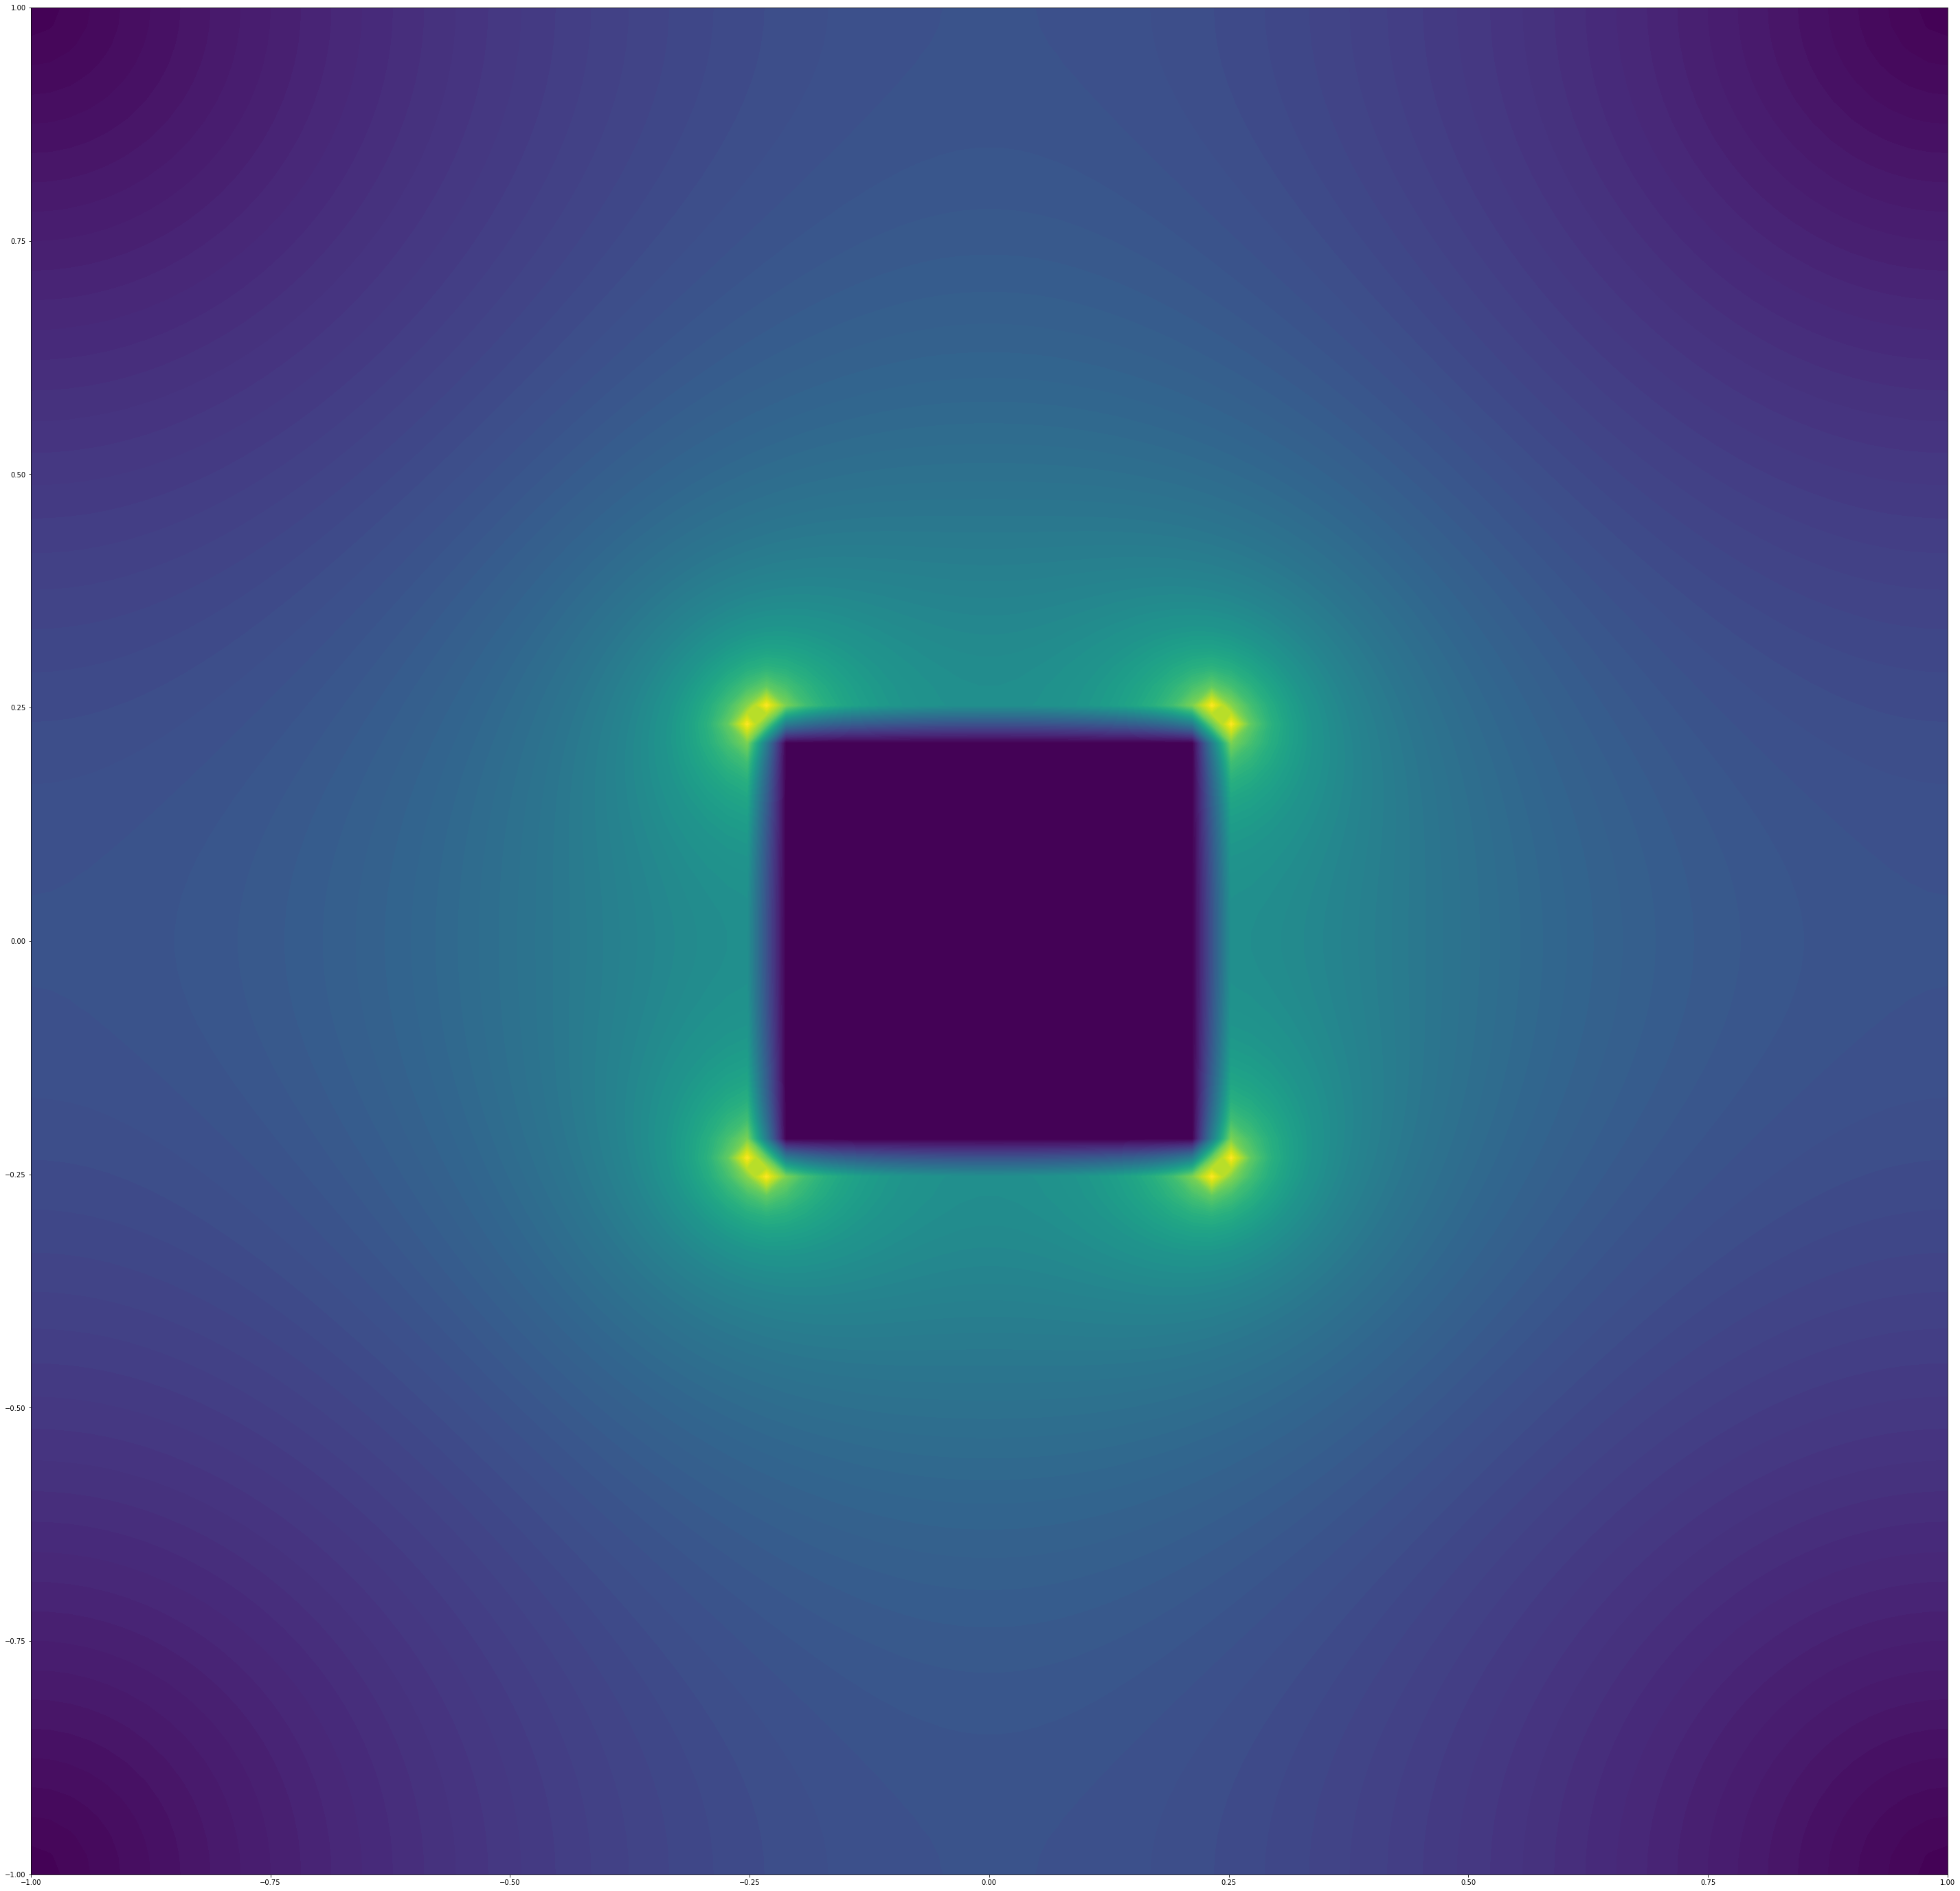

In [16]:
Ex, Ey = np.gradient(-potencial)
E_mag = np.sqrt(Ex**2 + Ey**2)
plt.figure(figsize=(50,50))
plt.contourf(xv, yv, E_mag, 100)

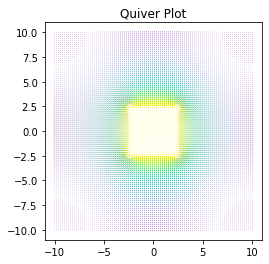

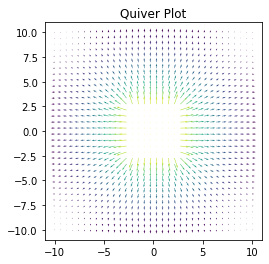

In [24]:
y, x = np.mgrid[10:-10:100j, 10:-10:100j]
dy, dx = np.gradient(potencial)
fig, ax = plt.subplots()
ax.quiver(x, y, dx, dy, potencial)
ax.set(aspect=1, title='Quiver Plot')
plt.show()
skip = (slice(None, None, 3), slice(None, None, 3))

fig, ax = plt.subplots()
ax.quiver(x[skip], y[skip], dx[skip], dy[skip], potencial[skip])
ax.set(aspect=1, title='Quiver Plot')
plt.show()


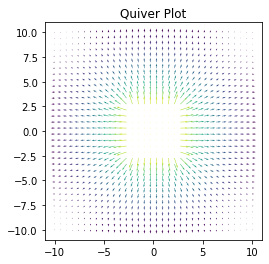

In [18]:
skip = (slice(None, None, 3), slice(None, None, 3))

fig, ax = plt.subplots()
ax.quiver(x[skip], y[skip], dx[skip], dy[skip], potencial[skip])
ax.set(aspect=1, title='Quiver Plot')
plt.show()

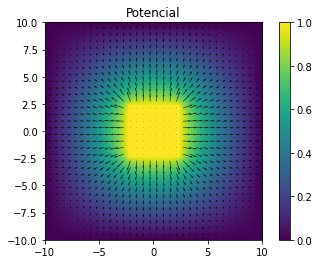

In [36]:
skip = (slice(None, None, 3), slice(None, None, 3))

fig, ax = plt.subplots()
im = ax.imshow(potencial, extent=[x.min(), x.max(), y.min(), y.max()])
ax.quiver(x[skip], y[skip], dx[skip], dy[skip])

fig.colorbar(im)
ax.set(aspect=1, title='Potencial')
plt.show()